In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [26]:
df = df.drop(['Unnamed: 0','Id'], axis=1)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [63]:
train_data = df.values
Y = train_data[:,-1].reshape(train_data.shape[0],1)
X = train_data[:,:-1]


In [64]:
X = np.vstack((np.ones((X.shape[0],)), X.T)).T

In [81]:
def costFunction(yPred, y):
    return np.sum(np.square(yPred - y)) / (2 * y.size)

In [89]:
def model(X, Y, learningRate, iterations):
    theta = np.zeros((X.shape[1], 1))
    costList = []
    
    for i in range(iterations):

        y_pred = np.dot(X, theta)
        
        cost = costFunction(y_pred, Y)
        costList.append(cost)

        theta = theta - (learningRate * np.dot(X.T, (y_pred - Y))/Y.size)
    return theta, costList

# def model(X, Y, learning_rate, iteration):
#     m = Y.size
#     theta = np.zeros((X.shape[1], 1))
#     cost_list = []
#     for i in range(iteration):
#         y_pred = np.dot(X, theta)
#         cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
#         d_theta = (1/m)*np.dot(X.T, y_pred - Y)
#         theta = theta - learning_rate*d_theta
#         cost_list.append(cost)
#         # to print the cost for 10 times
#         if(i%(iteration/10) == 0):
#             print("Cost is :", cost)
#     return theta, cost_list

In [94]:
theta, costList = model(X, Y, 0.0000000005, 10000)
print(theta)
print(costList)

[[ 8.91612794e-07]
 [ 5.37290769e-05]
 [ 2.75040466e-06]
 [-7.07826365e-07]
 [ 8.95288631e-07]
 [ 2.07570239e-06]
 [ 2.53967226e-06]
 [ 1.68333735e-09]
 [ 2.93203329e-06]
 [-3.55793371e-08]
 [ 9.67077765e-06]
 [ 1.78178916e-06]
 [ 1.79313571e-06]
 [ 7.18340167e-07]
 [ 2.63350018e-06]
 [ 4.43789509e-06]
 [ 5.43858221e-06]
 [ 1.75103975e-03]
 [ 1.76441948e-03]
 [ 9.44596451e-07]
 [-1.17687382e-07]
 [ 8.44216479e-06]
 [ 9.19876159e-06]
 [ 1.64412130e-06]
 [-1.62145640e-05]
 [ 2.65128702e-06]
 [ 3.25870130e-06]
 [ 1.14703345e-06]
 [ 2.43811777e-06]
 [ 2.56353892e-06]
 [ 2.21067424e-06]
 [ 2.32343081e-06]
 [ 2.06062445e-04]
 [ 4.12014352e-06]
 [ 3.59835660e-05]
 [ 1.47775308e-04]
 [ 3.89821318e-04]
 [ 9.27591934e-07]
 [ 1.72939459e-06]
 [ 8.31781744e-07]
 [ 3.12162411e-06]
 [ 2.41990131e-05]
 [-8.17121678e-06]
 [ 5.77335222e-04]
 [ 2.97156390e-07]
 [ 5.83730390e-08]
 [ 8.81124864e-07]
 [ 2.07630025e-07]
 [ 1.86184797e-06]
 [ 8.62987420e-07]
 [ 2.50555070e-06]
 [ 5.30947470e-06]
 [ 1.2170482

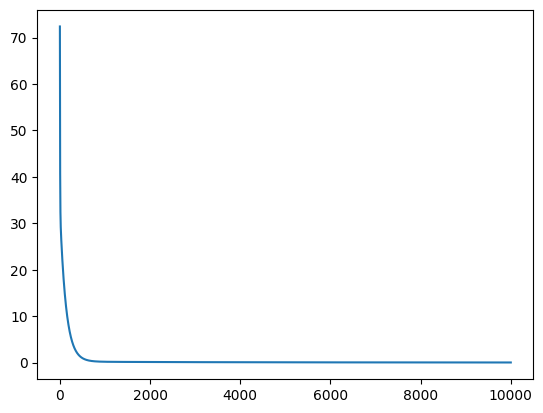

In [95]:
rng = np.arange(0, 10000)
plt.plot(rng, costList)
plt.show()